In [1]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

In [2]:
df = pd.read_csv('data/stud.csv')

In [3]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
X = df.drop('math_score',axis=1)
y= df['math_score']

In [5]:
X

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75
...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,99,95
996,male,group C,high school,free/reduced,none,55,55
997,female,group C,high school,free/reduced,completed,71,65
998,female,group D,some college,standard,completed,78,77


In [6]:
# Create Column Transformer with 3 types of transformers
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
         ("StandardScaler", numeric_transformer, num_features),
    ]
)

In [7]:
X = preprocessor.fit_transform(X)

In [8]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((800, 19), (200, 19))

In [9]:
# Create a function to evaluate model
def evaluate_model(model):
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    print('Model Performance')
    print('R2 Score: {}'.format(r2_score(y_test,y_pred)))
    print('MAE: {}'.format(mean_absolute_error(y_test,y_pred)))
    print('MSE: {}'.format(mean_squared_error(y_test,y_pred)))
    print('RMSE: {}'.format(np.sqrt(mean_squared_error(y_test,y_pred))))

In [10]:
# dictionary of models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'KNN': KNeighborsRegressor(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'AdaBoost': AdaBoostRegressor(),
    'XGBoost': XGBRegressor(),
    'CatBoost': CatBoostRegressor(verbose=0)
}

In [11]:
# loop through the models and evaluate
for name, model in models.items():
    print(name)
    evaluate_model(model)
    print('-'*40)

Linear Regression
Model Performance
R2 Score: 0.8803449074540941
MAE: 4.2158203125
MSE: 29.116678771972655
RMSE: 5.3959872842671395
----------------------------------------
Ridge Regression
Model Performance
R2 Score: 0.8805931485028737
MAE: 4.211100688014261
MSE: 29.056272192348324
RMSE: 5.390387016935642
----------------------------------------
Lasso Regression
Model Performance
R2 Score: 0.8253197323627852
MAE: 5.157881810347763
MSE: 42.50641683841162
RMSE: 6.51969453566742
----------------------------------------
KNN
Model Performance
R2 Score: 0.7821922064088529
MAE: 5.638999999999999
MSE: 53.001000000000005
RMSE: 7.280178569238532
----------------------------------------
Decision Tree
Model Performance
R2 Score: 0.7752512550423607
MAE: 5.91
MSE: 54.69
RMSE: 7.395268757793729
----------------------------------------
Random Forest
Model Performance
R2 Score: 0.8545454938672281
MAE: 4.5949125
MSE: 35.39466679513889
RMSE: 5.949341711075175
----------------------------------------
Ada

we can choose ridge model since it has the highest r2 score

In [12]:
lin_model = Ridge(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 88.06


Text(0, 0.5, 'Predicted')

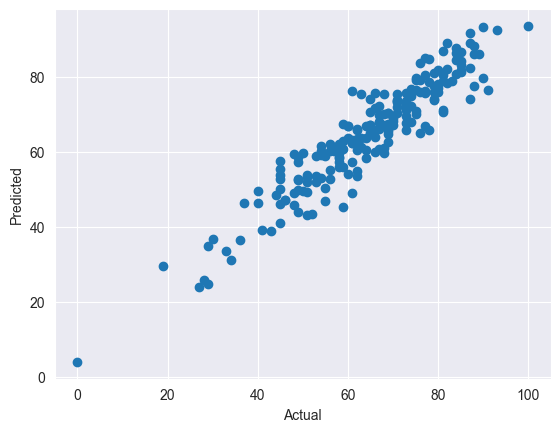

In [13]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

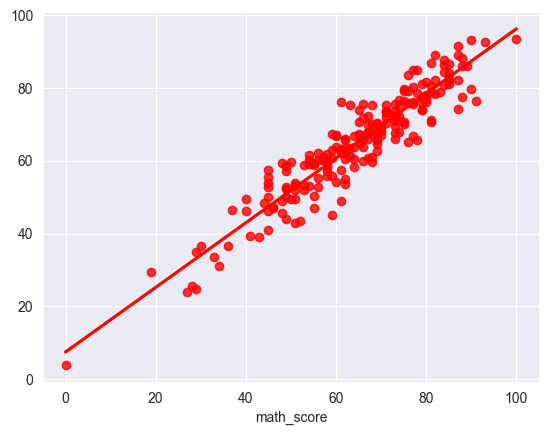

In [14]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');

In [15]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
521,91,76.398705,14.601295
737,53,58.842469,-5.842469
740,80,76.992129,3.007871
660,74,76.805898,-2.805898
411,84,87.615387,-3.615387
...,...,...,...
408,52,43.492293,8.507707
332,62,62.170763,-0.170763
208,74,67.910325,6.089675
613,65,67.061504,-2.061504


In [16]:
# save the model
import pickle
pickle.dump(lin_model,open('model.pkl','wb'))